In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
%matplotlib inline

shap.initjs()

In [20]:
rawdf = pd.read_csv('Diabetes.csv')
rawdf.rename(columns={"Ln(Age)":"LnAge"},inplace=True)
rawdf.head(30)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,LnAge,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,3.044522,0
1,8,92,93,47,36,21.240576,0.158365,23,3.135494,0
2,7,115,47,52,35,41.511523,0.079019,23,3.135494,0
3,9,103,78,25,304,29.582192,1.282870,43,3.761200,1
4,1,85,59,27,35,42.604536,0.549542,22,3.091042,0
5,0,82,92,9,253,19.724160,0.103424,26,3.258097,0
6,0,133,47,19,227,21.941357,0.174160,21,3.044522,0
7,0,67,87,43,36,18.277723,0.236165,26,3.258097,0
8,8,80,95,33,24,26.624929,0.443947,53,3.970292,1
9,1,72,31,40,42,36.889576,0.103944,26,3.258097,0


In [3]:
df = rawdf.copy()

#feature scale
ss = StandardScaler()
scale_features = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']
                  
df[scale_features] = ss.fit_transform(df[scale_features])

In [4]:
minmax = MinMaxScaler()
minmax_features = ['Pregnancies','DiabetesPedigree','Age','LnAge']
df[minmax_features] = minmax.fit_transform(df[minmax_features])

In [19]:
df.head(30)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,LnAge,Diabetic
0,0.000000,1.974401,0.523884,0.356298,-0.863136,1.229683,0.510511,0.000000,0.000000,0
1,0.571429,-0.495823,1.299626,1.249448,-0.765438,-1.052302,0.036123,0.035714,0.070017,0
2,0.500000,0.223356,-1.445306,1.592967,-0.772953,1.024922,0.000438,0.035714,0.070017,0
3,0.642857,-0.151868,0.404539,-0.262036,1.248633,-0.197512,0.541848,0.392857,0.551595,1
4,0.071429,-0.714703,-0.729237,-0.124629,-0.772953,1.136926,0.212047,0.017857,0.035804,0
5,0.000000,-0.808509,1.239953,-1.361298,0.865358,-1.207693,0.011414,0.089286,0.164378,0
6,0.000000,0.786192,-1.445306,-0.674259,0.669963,-0.980491,0.043226,0.000000,0.000000,0
7,0.000000,-1.277539,0.941591,0.974632,-0.765438,-1.355914,0.071112,0.089286,0.164378,0
8,0.571429,-0.871047,1.418971,0.287594,-0.855621,-0.500551,0.164558,0.571429,0.712523,1
9,0.071429,-1.121196,-2.400065,0.768521,-0.720347,0.551297,0.011648,0.089286,0.164378,0


In [6]:
feature_loc = [
    'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
    'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
    'LnAge'
]
X = df.loc[:, feature_loc]
Y = df.Diabetic

print(X.shape, Y.shape)

(15000, 9) (15000,)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.2, random_state=0)

In [8]:
from xgboost import XGBClassifier

In [9]:
model =  XGBClassifier (
    learning_rate=0.01,
    max_depth=6,
    objective="binary:logistic",
    subsample= 0.35,
    base_score=np.mean(Y_train),
    n_estimators=5000,
    max_features=0.35,
    min_samples_leaf=7,
    min_samples_split=15 
)
model.fit(X_train, Y_train, eval_metric='logloss', verbose=True,
            eval_set=[(X_test, Y_test)], early_stopping_rounds=20)

[0]	validation_0-logloss:0.629319
Will train until validation_0-logloss hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.622882
[2]	validation_0-logloss:0.616599
[3]	validation_0-logloss:0.610191
[4]	validation_0-logloss:0.603995
[5]	validation_0-logloss:0.598183
[6]	validation_0-logloss:0.592478
[7]	validation_0-logloss:0.586665
[8]	validation_0-logloss:0.580986
[9]	validation_0-logloss:0.575592
[10]	validation_0-logloss:0.570005
[11]	validation_0-logloss:0.564466
[12]	validation_0-logloss:0.559216
[13]	validation_0-logloss:0.554158
[14]	validation_0-logloss:0.549005
[15]	validation_0-logloss:0.544203
[16]	validation_0-logloss:0.539183
[17]	validation_0-logloss:0.534383
[18]	validation_0-logloss:0.529671
[19]	validation_0-logloss:0.525195
[20]	validation_0-logloss:0.520763
[21]	validation_0-logloss:0.516511
[22]	validation_0-logloss:0.512212
[23]	validation_0-logloss:0.507999
[24]	validation_0-logloss:0.503905
[25]	validation_0-logloss:0.499992
[26]	validation_0-logloss:0.4958

[230]	validation_0-logloss:0.209548
[231]	validation_0-logloss:0.209165
[232]	validation_0-logloss:0.208783
[233]	validation_0-logloss:0.208342
[234]	validation_0-logloss:0.207932
[235]	validation_0-logloss:0.207556
[236]	validation_0-logloss:0.207158
[237]	validation_0-logloss:0.206696
[238]	validation_0-logloss:0.206294
[239]	validation_0-logloss:0.205834
[240]	validation_0-logloss:0.205418
[241]	validation_0-logloss:0.205052
[242]	validation_0-logloss:0.204668
[243]	validation_0-logloss:0.20426
[244]	validation_0-logloss:0.203847
[245]	validation_0-logloss:0.203487
[246]	validation_0-logloss:0.203157
[247]	validation_0-logloss:0.202741
[248]	validation_0-logloss:0.202364
[249]	validation_0-logloss:0.201996
[250]	validation_0-logloss:0.201642
[251]	validation_0-logloss:0.201254
[252]	validation_0-logloss:0.200782
[253]	validation_0-logloss:0.200447
[254]	validation_0-logloss:0.200083
[255]	validation_0-logloss:0.199731
[256]	validation_0-logloss:0.199381
[257]	validation_0-logloss:0.

[459]	validation_0-logloss:0.15431
[460]	validation_0-logloss:0.15425
[461]	validation_0-logloss:0.154112
[462]	validation_0-logloss:0.153984
[463]	validation_0-logloss:0.153885
[464]	validation_0-logloss:0.153796
[465]	validation_0-logloss:0.153717
[466]	validation_0-logloss:0.153604
[467]	validation_0-logloss:0.153504
[468]	validation_0-logloss:0.15331
[469]	validation_0-logloss:0.153156
[470]	validation_0-logloss:0.153038
[471]	validation_0-logloss:0.152965
[472]	validation_0-logloss:0.152791
[473]	validation_0-logloss:0.15266
[474]	validation_0-logloss:0.152563
[475]	validation_0-logloss:0.152438
[476]	validation_0-logloss:0.15236
[477]	validation_0-logloss:0.152254
[478]	validation_0-logloss:0.15215
[479]	validation_0-logloss:0.152087
[480]	validation_0-logloss:0.151933
[481]	validation_0-logloss:0.151806
[482]	validation_0-logloss:0.151663
[483]	validation_0-logloss:0.151569
[484]	validation_0-logloss:0.151493
[485]	validation_0-logloss:0.151447
[486]	validation_0-logloss:0.15128

[688]	validation_0-logloss:0.1363
[689]	validation_0-logloss:0.13631
[690]	validation_0-logloss:0.136253
[691]	validation_0-logloss:0.136202
[692]	validation_0-logloss:0.136154
[693]	validation_0-logloss:0.136103
[694]	validation_0-logloss:0.136055
[695]	validation_0-logloss:0.135995
[696]	validation_0-logloss:0.135974
[697]	validation_0-logloss:0.135916
[698]	validation_0-logloss:0.135882
[699]	validation_0-logloss:0.135839
[700]	validation_0-logloss:0.135801
[701]	validation_0-logloss:0.135737
[702]	validation_0-logloss:0.135716
[703]	validation_0-logloss:0.135717
[704]	validation_0-logloss:0.135641
[705]	validation_0-logloss:0.135628
[706]	validation_0-logloss:0.135601
[707]	validation_0-logloss:0.135515
[708]	validation_0-logloss:0.135508
[709]	validation_0-logloss:0.135511
[710]	validation_0-logloss:0.135479
[711]	validation_0-logloss:0.1354
[712]	validation_0-logloss:0.135401
[713]	validation_0-logloss:0.135301
[714]	validation_0-logloss:0.135264
[715]	validation_0-logloss:0.1352

[917]	validation_0-logloss:0.1298
[918]	validation_0-logloss:0.12985
[919]	validation_0-logloss:0.129865
[920]	validation_0-logloss:0.129814
[921]	validation_0-logloss:0.12982
[922]	validation_0-logloss:0.129778
[923]	validation_0-logloss:0.129739
[924]	validation_0-logloss:0.129703
[925]	validation_0-logloss:0.129721
[926]	validation_0-logloss:0.1297
[927]	validation_0-logloss:0.129721
[928]	validation_0-logloss:0.129714
[929]	validation_0-logloss:0.129698
[930]	validation_0-logloss:0.129662
[931]	validation_0-logloss:0.129639
[932]	validation_0-logloss:0.129647
[933]	validation_0-logloss:0.12964
[934]	validation_0-logloss:0.129604
[935]	validation_0-logloss:0.129603
[936]	validation_0-logloss:0.129593
[937]	validation_0-logloss:0.129584
[938]	validation_0-logloss:0.129595
[939]	validation_0-logloss:0.129579
[940]	validation_0-logloss:0.129595
[941]	validation_0-logloss:0.129569
[942]	validation_0-logloss:0.129559
[943]	validation_0-logloss:0.129564
[944]	validation_0-logloss:0.12955


[1142]	validation_0-logloss:0.127058
[1143]	validation_0-logloss:0.127036
[1144]	validation_0-logloss:0.127022
[1145]	validation_0-logloss:0.127002
[1146]	validation_0-logloss:0.126991
[1147]	validation_0-logloss:0.126981
[1148]	validation_0-logloss:0.126915
[1149]	validation_0-logloss:0.126937
[1150]	validation_0-logloss:0.126962
[1151]	validation_0-logloss:0.126939
[1152]	validation_0-logloss:0.126974
[1153]	validation_0-logloss:0.126971
[1154]	validation_0-logloss:0.126928
[1155]	validation_0-logloss:0.1269
[1156]	validation_0-logloss:0.126909
[1157]	validation_0-logloss:0.126888
[1158]	validation_0-logloss:0.126898
[1159]	validation_0-logloss:0.126885
[1160]	validation_0-logloss:0.126876
[1161]	validation_0-logloss:0.126832
[1162]	validation_0-logloss:0.126822
[1163]	validation_0-logloss:0.126817
[1164]	validation_0-logloss:0.126825
[1165]	validation_0-logloss:0.126816
[1166]	validation_0-logloss:0.126822
[1167]	validation_0-logloss:0.12682
[1168]	validation_0-logloss:0.126827
[116

XGBClassifier(base_score=0.3335, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, max_features=0.35, min_child_weight=1,
       min_samples_leaf=7, min_samples_split=15, missing=None,
       n_estimators=5000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.35)

In [10]:
y_pre = model.predict(X_test)
y_pro = model.predict_proba(X_test)[:, 1]
print ("AUC Score : %f" % roc_auc_score(Y_test, y_pro))
print("Testing Accuracy : %.4g%%" % (accuracy_score(Y_test, y_pre)*100))

AUC Score : 0.988870
Testing Accuracy : 95.13%


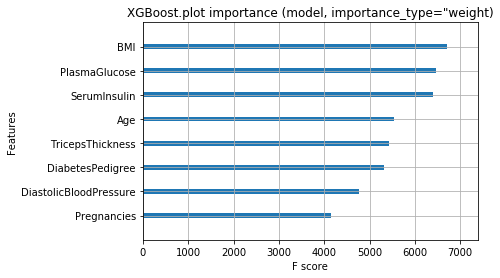

In [11]:
xgb.plot_importance(model,importance_type="weight",show_values=False)
plt.title('XGBoost.plot importance (model, importance_type="weight)')
plt.show()

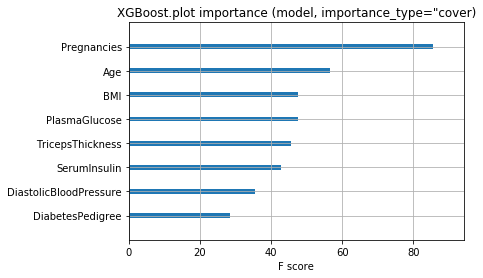

In [12]:
xgb.plot_importance(model,importance_type="cover",show_values=False,ylabel=None)
plt.title('XGBoost.plot importance (model, importance_type="cover)')
plt.show()

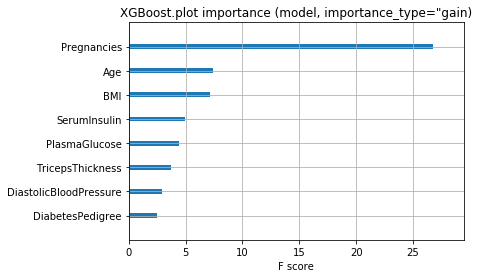

In [13]:
xgb.plot_importance(model,importance_type="gain",show_values=False,ylabel=None)
plt.title('XGBoost.plot importance (model, importance_type="gain)')
plt.show()

In [14]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.force_plot(shap_values[1,:], X.iloc[0,:],link='logit')

In [15]:
shap.force_plot(shap_values[:1000,:], X.iloc[:1000,:],link='logit')

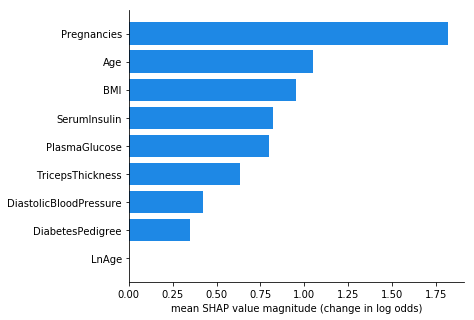

In [16]:
globat_shap_vals = np.abs(shap_values).mean(0)[:-1]
inds = np.argsort(globat_shap_vals)
y_pos = np.arange(X.shape[1])
plt.barh(y_pos, globat_shap_vals[inds], color='#1E88E5')
plt.yticks(y_pos, X.columns[inds])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("mean SHAP value magnitude (change in log odds)")
plt.gcf().set_size_inches(6,5)
plt.show()

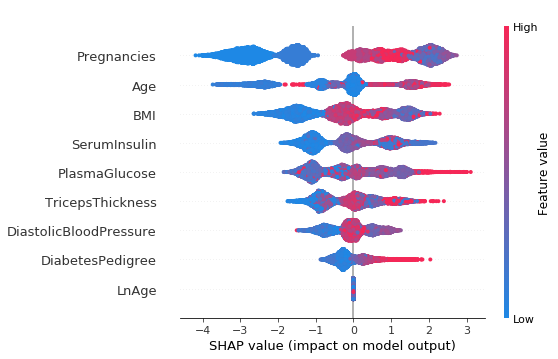

In [17]:
shap.summary_plot(shap_values, X)

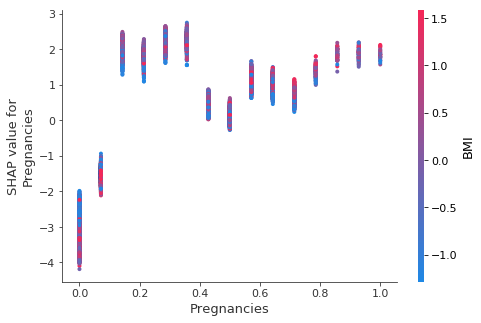

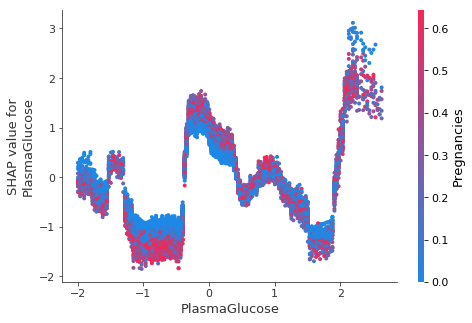

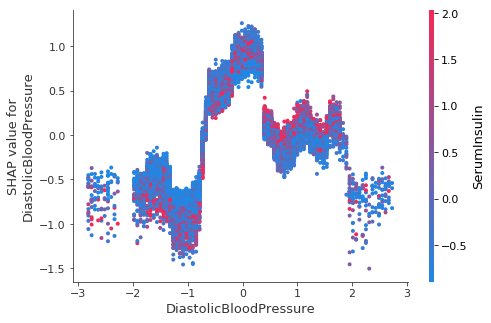

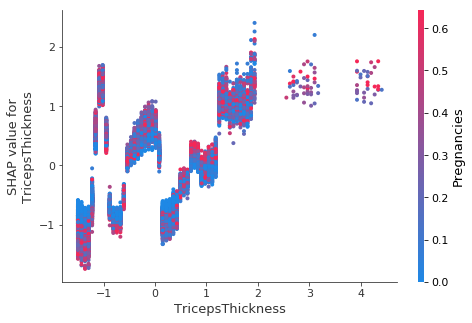

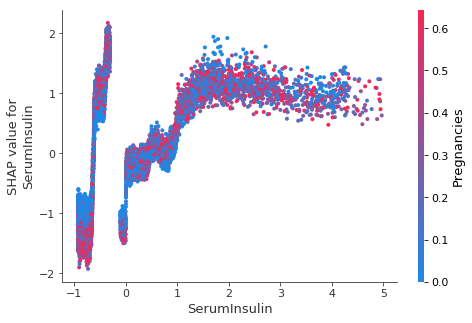

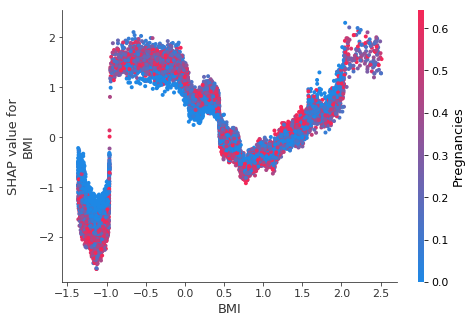

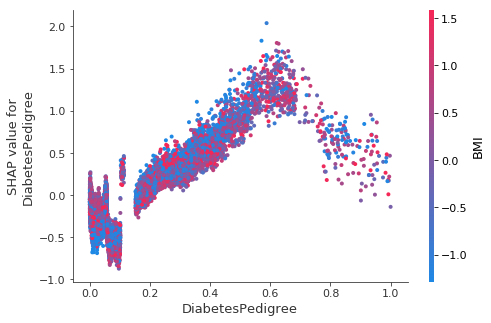

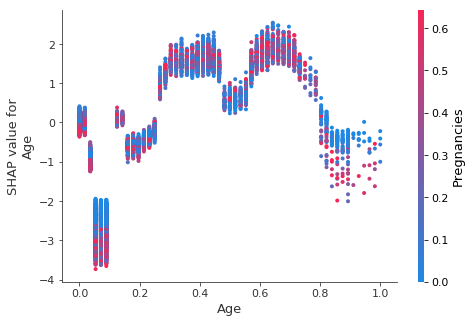

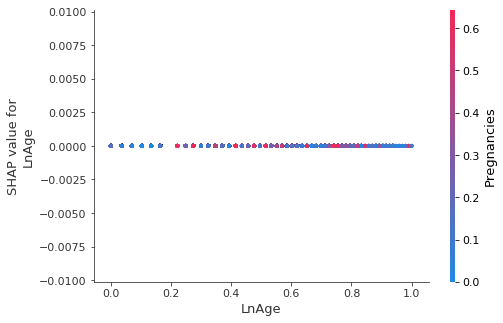

In [18]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X)